In [1]:
import numpy as np

from uncertainties import ufloat
from uncertainties import umath

from astropy import units as u
from astropy.units import astrophys as astru

In [11]:
T = ufloat(10, 2) ** 2
T

100.0+/-40.0

In [1]:
import sys
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/standard_modules')
sys.path.append('C://Users/olive/OneDrive - Australian National University/Honours-Olivia/Programs/honours/project')

from collation import collator, hvc_snapshot as snap
from synthesis import hvc_looper as hvcl, magnetic_field_derivation as mfd

collated_data = collator.data_whole_sky(False, load_data=["../data_processed/proc_rms","../data_processed/proc_hvcs"], h1_img="../data_catalog/hi4pi-hvc-nhi-car.fits", override_RMs=True)

#print("")

#hvc = snap.take_snapshot(1, collated_data["RMs"], collated_data["HVCs"], collated_data["HI"], collated_data["H-alpha"], collated_data["interpolation"], rm_load_file="../data_processed/hvc_rms/hvc_rms_index_1")

=== WHOLE-SKY DATA COLLATION ===
Gathering data ...
Getting H-alpha emission
Extracting RMs
Getting HVC location data
Getting HI emission
Interpolating
Collation complete


In [2]:
#hvcl.add_magnetic_field_RMs(collated_data)

from astropy.table import vstack

master_rm = hvcl.load_HVC_RMs(collated_data, hvc_indicies=[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 16, 22, 24])
master_rm_flat = vstack(master_rm)

#B_virtual = mfd.get_magnetic_field_HVC(hvc)
#B_virtual

=== HVC RM LOADER ===
Taking HVC snapshots
Process complete


In [3]:
print(len(master_rm))

15


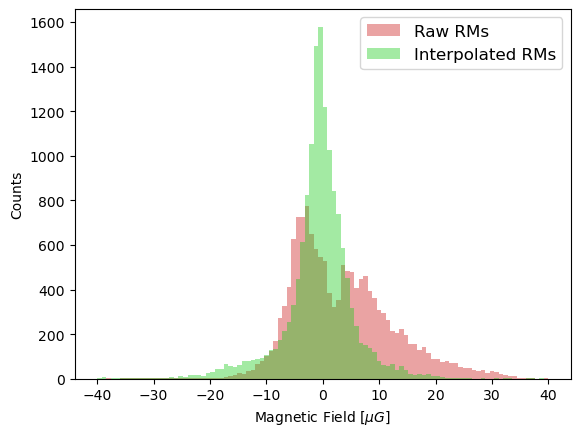

In [5]:
import matplotlib.pyplot as plt
from plotting import honours_plot as hplt

hplt.plot_3hist(master_rm_flat["B_virtual [raw]"] * 1e6, master_rm_flat["B_virtual [int]"] * 1e6, master_rm_flat["B_virtual [int]"] * 1e6, "Raw RMs", "Interpolated RMs", "", "", (-40, 40), xlabel=r"Magnetic Field [$\mu G$]", ylabel="Counts", legend_size=12) # Virtual (single-point) magnetic field profile of filtered HVCs